## 1.1 Modules

In [4]:
import statistics as ST
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pickle
import scipy.stats
import numpy as np
import math
import copy
import re
import matplotlib as mpl
mpl.rcParams["font.size"] = 12
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42

## Fig. 1

In [6]:
YPD_expression_f100 = pd.read_csv('Source_data/' + 'Fig1_YPD_expression.csv')

In [7]:
subset_1d_x = pd.read_csv('Source_data/' + 'Fig1_YPD_expression_high_rna_subset.csv')

In [8]:
Recontructed_RD = pd.read_csv('Source_data/' + 'Fig1_YPD_reconstructed_promoters.csv')

In [9]:
YPD_RT = pd.read_csv('Source_data/' + 'Fig1_YPD_RTqPCR.csv')

In [10]:
np.random.seed(0)
re_sampled = np.random.choice(YPD_expression_f100.shape[0],1000,replace = False)

### Plotting

In [11]:
# DNA

In [12]:
temp_r_s2a,temp_p_s2a = scipy.stats.pearsonr(YPD_expression_f100['DNA_relative_count_S1'],YPD_expression_f100['DNA_relative_count_S3'])
temp_r_s2a,temp_p_s2a

(0.9910035971309467, 0.0)

In [13]:
temp_r_s2d,temp_p_s2d = scipy.stats.pearsonr(YPD_expression_f100['DNA_relative_count_S2'],YPD_expression_f100['DNA_relative_count_S3'])
temp_r_s2d,temp_p_s2d

(0.9911514250690632, 0.0)

In [14]:
# RNA

In [15]:
temp_r_s2b,temp_p_s2b = scipy.stats.pearsonr(YPD_expression_f100['RNA_relative_count_S1'],YPD_expression_f100['RNA_relative_count_S3'])
temp_r_s2b,temp_p_s2b

(0.7666887928834616, 0.0)

In [16]:
temp_r_s2e,temp_p_s2e = scipy.stats.pearsonr(YPD_expression_f100['RNA_relative_count_S2'],YPD_expression_f100['RNA_relative_count_S3'])
temp_r_s2e,temp_p_s2e

(0.8446518365766604, 0.0)

In [17]:
# expression

In [18]:
temp_r_s2c,temp_p_s2c = scipy.stats.pearsonr(YPD_expression_f100['S1_normalized_relative'],YPD_expression_f100['S3_normalized_relative'])
temp_r_s2c,temp_p_s2c

(0.42077422883208637, 0.0)

In [19]:
temp_r_s2f,temp_p_s2f = scipy.stats.pearsonr(YPD_expression_f100['S2_normalized_relative'],YPD_expression_f100['S3_normalized_relative'])
temp_r_s2f,temp_p_s2f

(0.5308867633132781, 0.0)

In [20]:
temp_r_s2c_x,temp_p_s2c_x = scipy.stats.pearsonr(subset_1d_x['S1_normalized_relative'],subset_1d_x['S3_normalized_relative'])
temp_r_s2c_x,temp_p_s2c_x

(0.8505605042802766, 3.804945115644202e-139)

In [21]:
temp_r_s2f_x,temp_p_s2f_x = scipy.stats.pearsonr(subset_1d_x['S2_normalized_relative'],subset_1d_x['S3_normalized_relative'])
temp_r_s2f_x,temp_p_s2f_x

(0.9285260624882457, 2.0154359365568873e-213)

In [23]:
t_YPD_RT,p_YPD_RT = scipy.stats.pearsonr(Recontructed_RD.Expression_mean,YPD_RT['dCT_fold_change'])

In [25]:
se_er_matrix_2=np.array([list(YPD_RT['dCT_fold_change']-YPD_RT['dCT_fold_change_min_se']),list(-YPD_RT['dCT_fold_change']+YPD_RT['dCT_fold_change_max_se'])])

Text(0, 0.5, 'Expression level based on RT-qPCR (A.U.)')

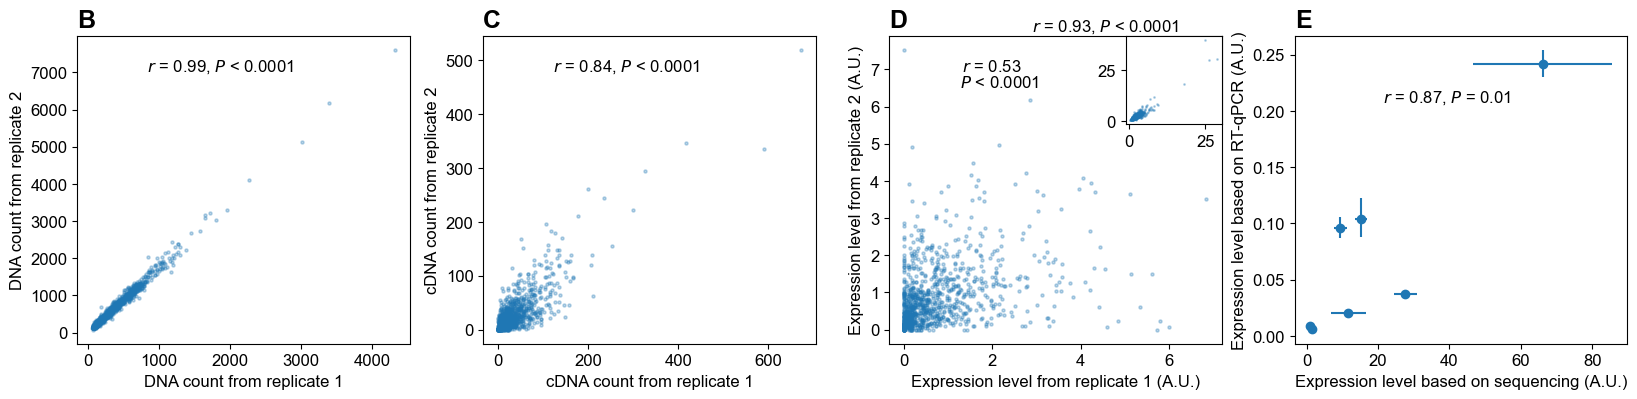

In [26]:
gs = gridspec.GridSpec(10, 46) 
fig1 = plt.figure(figsize=(20,4))
#Here I generate sub figure object and assign to corresponding location
# YPD
# DNA cor
ax1=fig1.add_subplot(gs[:10, :10])

ax1.scatter(YPD_expression_f100['DNA_relative_count_S2'][re_sampled],
            YPD_expression_f100['DNA_relative_count_S3'][re_sampled] ,s=5, alpha = 0.3)
ax1.set_title('B',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 1')
ax1.set_ylabel('DNA count from replicate 2')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s2d,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[0:10, 12:22])
ax2.scatter(YPD_expression_f100['RNA_relative_count_S2'][re_sampled],
            YPD_expression_f100['RNA_relative_count_S3'][re_sampled],s =5, alpha = 0.3 )
ax2.set_title('C',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 1')
ax2.set_ylabel('cDNA count from replicate 2')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s2e,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[:10, 24:34])
ax3.scatter(YPD_expression_f100['S1_normalized_relative'][re_sampled],
            YPD_expression_f100['S2_normalized_relative'][re_sampled],s =5, alpha = 0.3 )
ax3.set_title('D',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 1 (A.U.)')
ax3.set_ylabel('Expression level from replicate 2 (A.U.)')

ax3.text(0.40,0.9, "$\it{r}$ = "+str(round(temp_r_s2f,2)), size=12, ha="right",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.45,0.85, "$\it{P}$ < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[:3, 31:34])


ax4.scatter(subset_1d_x['S2_normalized_relative'],subset_1d_x['S3_normalized_relative'],s=1, alpha = 0.3)
ax4.text(0.55,1.1, "$\it{r}$ = "+str(round(temp_r_s2f_x,2))+", " + "$\it{P}$" + " < 0.0001", 
         size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)


# The error bar for this panel indicate 
ax5 = fig1.add_subplot(gs[:10, 36:46])
ax5.text(0.65,0.8, "$\it{r}$ = "+str(round(t_YPD_RT,2))+", " + "$\it{P}$" + " = 0.01", size=12, ha="right",verticalalignment='center', transform=ax5.transAxes)
ax5.errorbar(Recontructed_RD.Expression_mean,YPD_RT['dCT_fold_change'], xerr=Recontructed_RD.Expression_sem,yerr=se_er_matrix_2,fmt="o", color="tab:blue")
ax5.set_title('E',weight='bold', loc='left', size= 18)
ax5.set_xlabel('Expression level based on sequencing (A.U.)')
ax5.set_ylabel('Expression level based on RT-qPCR (A.U.)')


# fig1.savefig(fig_output_address+'Fig1_part.pdf')

## Fig. 2

In [27]:
# normalized to median yeast promoter expresssion
p_2a_YPD_100 = pd.read_csv('Source_data/' + 'Fig2_YPD_RD_expression.csv')

In [28]:
# normalized to median yeast promoter expresssion
p_2b_SCD_100 = pd.read_csv('Source_data/' + 'Fig2_SCD_RD_expression.csv')

In [29]:
YPD_E_genic_average = pd.read_csv('Source_data/' + 'Fig2_YPD_native_gene_expression.csv')

In [30]:
SCD_E_genic_average = pd.read_csv('Source_data/' + 'Fig2_SCD_native_gene_expression.csv')

Text(0, 0.5, 'Frequency')

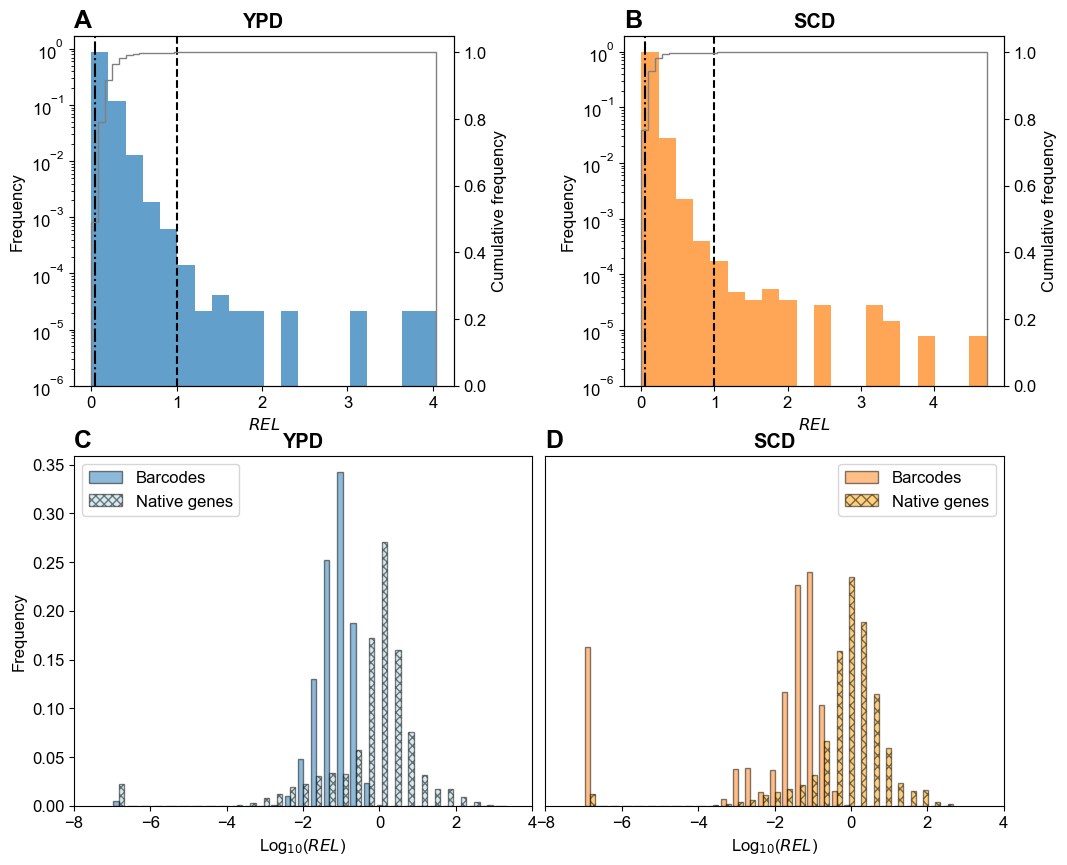

In [32]:
gs = gridspec.GridSpec(2, 12) 
fig1 = plt.figure(figsize=(12,10))
#Here I generate sub figure object and assign to corresponding location

#panel A for YPD expression distribution
ax1=fig1.add_subplot(gs[:1, :5])

x_w1 = np.empty(len(p_2a_YPD_100['relative_expression'].to_list()))
x_w1.fill(1/len(p_2a_YPD_100['relative_expression'].to_list()))


ax1.hist(p_2a_YPD_100['relative_expression'],weights=x_w1,bins=20,alpha = 0.7,bottom = 1e-6)
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='YPD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_title('YPD',loc='center',weight = 'bold')
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax1.set_xlabel("$\it{REL}$")
ax1.set_ylabel("Frequency")
ax1.axvline(x=0.05027564758670754,color='black', linestyle='-.')
ax1.axvline(x=1,color='black', linestyle='--')
# ax1.set_xlim(-0.1,2)
ax1.set_yscale('log',base = 10)

ax_double1 = ax1.twinx()
ax_double1.hist(p_2a_YPD_100['relative_expression'],bins=50, density=True, histtype='step', cumulative=True,
        label='Reversed emp.', color = 'grey',bottom = 1e-6)
ax_double1.set_ylabel("Cumulative frequency")

#panel B for SCD expression distribution

ax2=fig1.add_subplot(gs[:1, 7:12])
ax2.set_title('SCD',loc='center',weight = 'bold')
x_w1 = np.empty(len(p_2b_SCD_100['relative_expression'].to_list()))
x_w1.fill(1/len(p_2b_SCD_100['relative_expression'].to_list()))


ax2.hist(p_2b_SCD_100['relative_expression'],weights=x_w1,
         bottom = 1e-6,bins=20,alpha = 0.7,color = 'tab:orange')
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='SCD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax2.set_title('B',weight='bold', loc='left', size= 18)
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax2.set_xlabel("$\it{REL}$")
ax2.set_ylabel("Frequency")
ax2.axvline(x=0.04596995226553077,color='black', linestyle='-.')
ax2.axvline(x=1,color='black', linestyle='--')
# ax2.set_xlim(-0.1,2)
ax2.set_yscale('log',base = 10)

ax_double2 = ax2.twinx()
ax_double2.hist(p_2b_SCD_100['relative_expression'],bins=50, density=True, histtype='step', cumulative=True,
        label='Reversed emp.', color = 'grey',bottom = 1e-6)
ax_double2.set_ylabel("Cumulative frequency")



# random promoter compared to native promoter
ax3=fig1.add_subplot(gs[1:2, :6])
ax3.set_title('YPD',loc='center',weight = 'bold')
temp_input = [p_2a_YPD_100['log_expression'].to_list(),YPD_E_genic_average['log_expression'].to_list()]
x_w1 = np.empty(len(p_2a_YPD_100['log_expression'].to_list()))
x_w1.fill(1/len(p_2a_YPD_100['log_expression'].to_list()))
x_w2 = np.empty(len(YPD_E_genic_average['log_expression'].to_list()))
x_w2.fill(1/len(YPD_E_genic_average['log_expression'].to_list()))


n, bins, patches = ax3.hist(temp_input,bins=30, alpha=0.5, 
                            weights=[x_w1, x_w2], label=['Barcodes','Native genes'],
                            color=['tab:blue','lightblue'],edgecolor='black', linewidth=1)
hatches = ['', 'xxxx']
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)


# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='YPD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax3.set_title('C',weight='bold', loc='left', size= 18)
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax3.set_xlabel("Log$_{10}$($\it{REL}$)")
ax3.set_ylabel("Frequency")
# ax1.axvline(x=math.log10(YPD_nc_S[0]),color='black', linestyle='--')
# ax1.axvline(x=math.log10(YPD_pc_S[0]),color='black', linestyle='--')
ax3.set_xlim(-8,4)
ax3.legend(loc="upper left")

#panel B for SCD expression distribution

ax4=fig1.add_subplot(gs[1:2, 6:12],sharey = ax3,sharex = ax3)

ax4.set_title('SCD',loc='center',weight = 'bold')
temp_input = [p_2b_SCD_100['log_expression'].to_list(),SCD_E_genic_average['log_expression'].to_list()]
x_w1 = np.empty(len(p_2b_SCD_100['log_expression'].to_list()))
x_w1.fill(1/len(p_2b_SCD_100['log_expression'].to_list()))
x_w2 = np.empty(len(SCD_E_genic_average['log_expression'].to_list()))
x_w2.fill(1/len(SCD_E_genic_average['log_expression'].to_list()))

n, bins, patches  = ax4.hist(temp_input,bins=30, alpha=0.5, 
                             weights=[x_w1, x_w2], label=['Barcodes','Native genes'],
                             color=['tab:orange','orange'],edgecolor='black', linewidth=1)
hatches = ['', 'xxx']
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)
ax4.legend(loc="upper right")
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='SCD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax4.set_title('D',weight='bold', loc='left', size= 18)
ax4.axes.yaxis.set_visible(False)
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax4.set_xlabel("Log$_{10}$($\it{REL}$)")
ax4.set_ylabel("Frequency")
# fig1.savefig(fig_output_address+'Fig2_raw.pdf')

---

## Fig. 3 

In [36]:
p_3ab_YPD = pd.read_csv('Source_data/' + 'Fig3_YPD_sequence_feature_quantile.csv')

In [38]:
YPD_s_df = pd.read_csv('Source_data/' + 'Fig3_YPD_motif_significant.csv')

In [39]:
YPD_s_shuffled_df = pd.read_csv('Source_data/' + 'Fig3_YPD_motif_significant_shuffled.csv')

In [40]:
YPD_strand_merge = pd.read_csv('Source_data/' + 'Fig3_YPD_motif_strand_specific_effect.csv')

In [42]:
p3e_YPD_r,p3e_YPD_p = scipy.stats.pearsonr(YPD_strand_merge['relative_fold_median_Forward'],YPD_strand_merge['relative_fold_median_Reverse'])

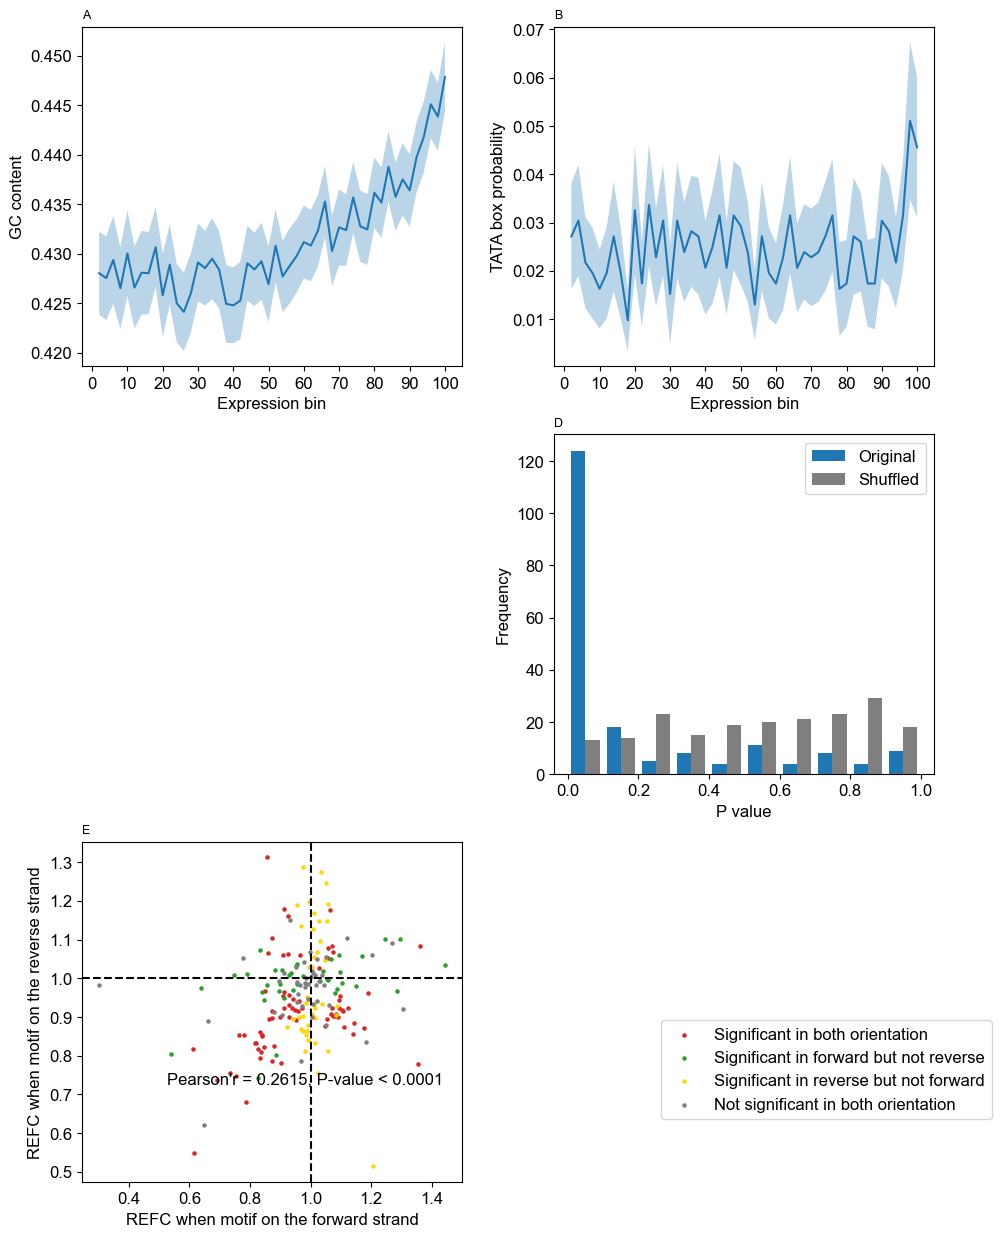

In [44]:
gs = gridspec.GridSpec(3, 11) 
fig1 = plt.figure(figsize=(11,15))
#Here I generate sub figure object and assign to corresponding location

#panel A for GC content on expression of YPD
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',size = 9)
ax1.plot((p_3ab_YPD['quantile']+1)*2,p_3ab_YPD[('GC_content_mean')], color = 'tab:blue')
ax1.fill_between((p_3ab_YPD['quantile']+1)*2, p_3ab_YPD[('GC_content_mean')]-p_3ab_YPD[('GC_content_sem')]*1.96,
                 p_3ab_YPD[('GC_content_mean')]+p_3ab_YPD[('GC_content_sem')]*1.96,alpha = 0.3)
ax1.set_xticks(np.arange(0, 110,10))
ax1.set_xlabel('Expression bin')
ax1.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('GC_content','mean')], color = 'tab:orange')
# ax1.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('GC_content','mean')]-p_3ab_SCD[('GC_content','sem')]*1.96, p_3ab_SCD[('GC_content','mean')]+p_3ab_SCD[('GC_content','sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',loc='left',size = 9)
ax2.plot((p_3ab_YPD['quantile']+1)*2,p_3ab_YPD[('TATA_box_mean')], color = 'tab:blue')
ax2.fill_between((p_3ab_YPD['quantile']+1)*2, p_3ab_YPD[('TATA_box_mean')]-p_3ab_YPD[('TATA_box_sem')]*1.96,
                 p_3ab_YPD[('TATA_box_mean')]+p_3ab_YPD[('TATA_box_sem')]*1.96,alpha = 0.3)
ax2.set_xticks(np.arange(0, 110,10))
ax2.set_xlabel('Expression bin')
ax2.set_ylabel('TATA box probability')

# ax2.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('TATA_box','mean')], color = 'tab:orange')
# ax2.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('TATA_box','mean')]-p_3ab_SCD[('TATA_box','sem')]*1.96, p_3ab_SCD[('TATA_box','mean')]+p_3ab_SCD[('TATA_box','sem')]*1.96,alpha = 0.3)



ax4=fig1.add_subplot(gs[1:2, 6:11])
# ax4.hist(YPD_s_shuffled_df[1]['Ranksum_P_value'],label = 'shuffled', color = 'tab:blue',bins = 50)
# ax4.hist(YPD_s_df[1]['Ranksum_P_value'],label = 'original',color = 'tab:pink',bins = 50)
# ax4.set_xscale('log',base = 10)
ax4.hist([YPD_s_df['Ranksum_P_value'],YPD_s_shuffled_df['Ranksum_P_value']],color = ['tab:blue','tab:grey'], label = ['Original','Shuffled'], bins = 10)
ax4.legend(loc='upper right')
ax4.set_title('D',loc='left',size = 9)
ax4.set_ylabel('Frequency')
ax4.set_xlabel('P value')


ax5=fig1.add_subplot(gs[2:3, :5])
input_df1 = YPD_strand_merge
filter1 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='Yes')
filter2 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='No')
filter3 = (input_df1['Significant_Forward']=='No')&(input_df1['Significant_Reverse']=='Yes')
filter4 = (input_df1['Significant_Forward']=='No')&(input_df1['Significant_Reverse']=='No')
ax5.scatter(input_df1.loc[filter1]['relative_fold_median_Forward'],input_df1.loc[filter1]['relative_fold_median_Reverse'], s=5, color = "tab:red", label = 'Significant in both orientation')
ax5.scatter(input_df1.loc[filter2]['relative_fold_median_Forward'],input_df1.loc[filter2]['relative_fold_median_Reverse'], s=5, color = "tab:green",label = 'Significant in forward but not reverse')
ax5.scatter(input_df1.loc[filter3]['relative_fold_median_Forward'],input_df1.loc[filter3]['relative_fold_median_Reverse'], s=5, color = "gold",label = 'Significant in reverse but not forward')
ax5.scatter(input_df1.loc[filter4]['relative_fold_median_Forward'],input_df1.loc[filter4]['relative_fold_median_Reverse'], s=5, color = "tab:grey",label = 'Not significant in both orientation')
# ax5.legend(loc="upper right")
ax5.set_title('E',loc='left',size = 9)
ax5.axvline(x=1,color='black', linestyle='--')
ax5.axhline(y=1,color='black', linestyle='--')
ax5.set_xlabel("REFC when motif on the forward strand")
ax5.set_ylabel("REFC when motif on the reverse strand")
ax5.text(0.95,0.3, "Pearson'r = "+str(round(p3e_YPD_r,4))+", P-value < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax5.transAxes)
ax5.legend(bbox_to_anchor =(1.5, 0.5))
# fig1.savefig(fig_output_address+'Fig3.pdf')

## Fig. 4

In [45]:
YPD_intergenic_expression_RNA = pd.read_csv(
    'Source_data/' + 'Fig4_YPD_intergenic_expression.csv')

In [46]:
SCD_intergenic_expression_RNA = pd.read_csv(
    'Source_data/' + 'Fig4_SCD_intergenic_expression.csv')

In [47]:
p_c_rd_YPD = pd.read_csv('Source_data/' + 'Fig4_YPD_RD_comparison_summary.csv')

In [48]:
p_c_RNAseq_YPD = pd.read_csv('Source_data/' + 'Fig4_YPD_intergenic_comparison_summary.csv')

In [49]:
YPD_RNA_fraction = pd.read_csv('Source_data/' + 'Fig4_YPD_intergenic_fraction_greater_than_cutoff.csv')

In [50]:
YPD_rd_fraction = pd.read_csv('Source_data/' + 'Fig4_YPD_RD_fraction_greater_than_cutoff.csv')

In [51]:
temp_shared_2 = pd.read_csv('Source_data/' + 'Fig4_YPD_Intergenic_GXE.csv')

In [52]:
temp_shared_1 = pd.read_csv('Source_data/' + 'Fig4_YPD_RD_GXE.csv')

In [54]:
from matplotlib.markers import MarkerStyle

/var/folders/xv/26kbh4lj2rjdcrxz37m9wxyw0000gn/T/ipykernel_61929/1787839566.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(temp_tick_list, size =9)


Text(0.5, 0, '$\\it{REL}$ cutoff')

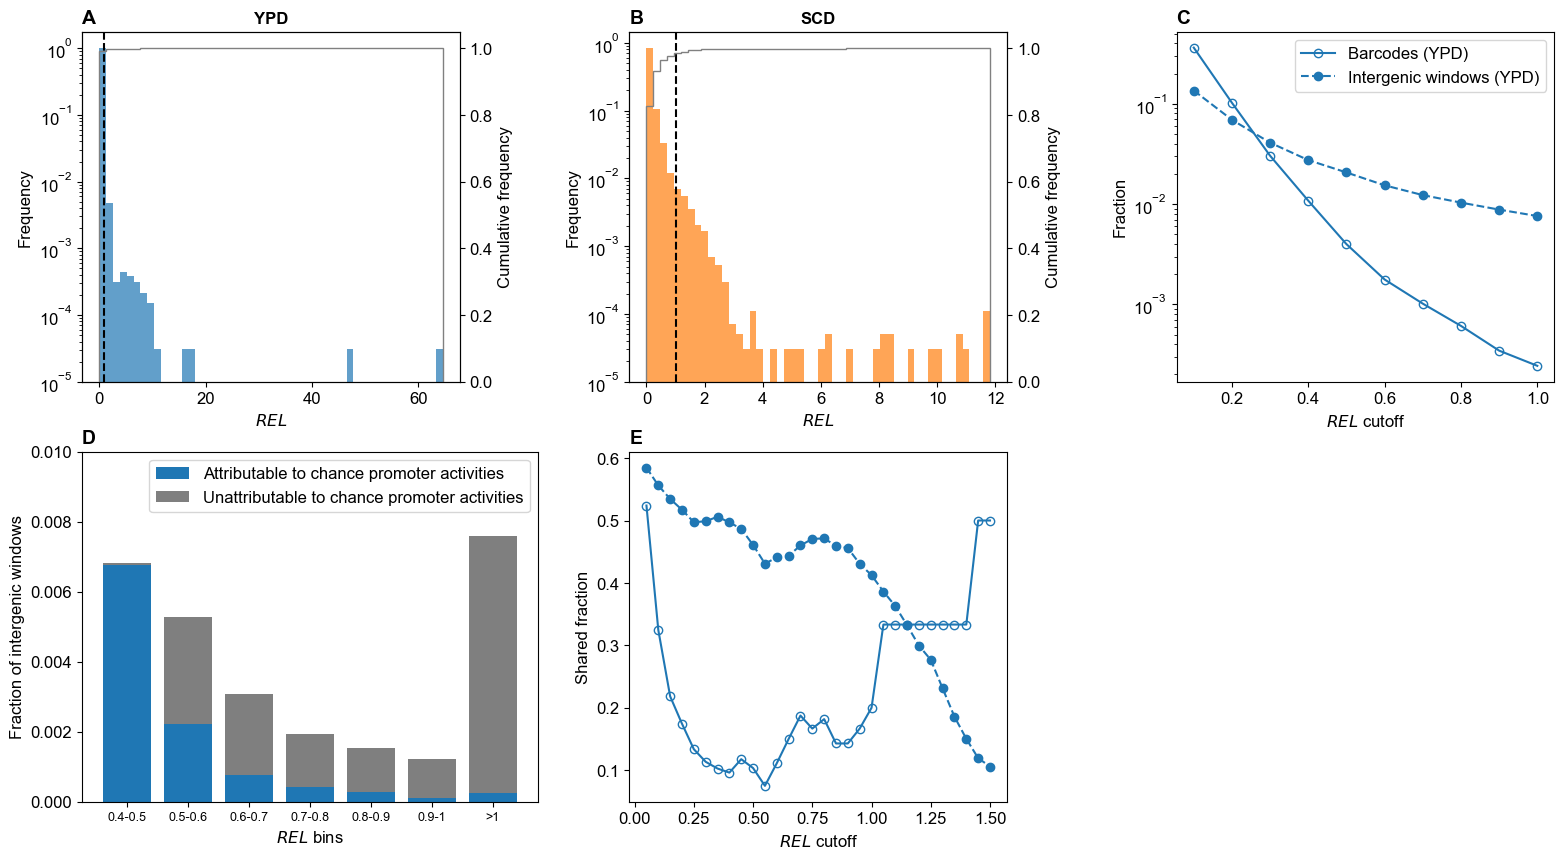

In [55]:
gs = gridspec.GridSpec(2, 19) 
fig1 = plt.figure(figsize=(19,10))
#Here I generate sub figure object and assign to corresponding location

#panel A for YPD expression distribution
ax1=fig1.add_subplot(gs[:1, :5])

x_w1 = np.empty(len(YPD_intergenic_expression_RNA['Mean_relative_expression'].to_list()))
x_w1.fill(1/len(YPD_intergenic_expression_RNA['Mean_relative_expression'].to_list()))

ax1.hist(YPD_intergenic_expression_RNA['Mean_relative_expression'],
         weights=x_w1,bins=50,alpha = 0.7,bottom = 1e-5)
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='YPD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax1.set_title('A',loc='left',weight ='bold', size = 14)
ax1.set_title('YPD',loc='center',weight ='bold', size = 12)
# ax1.legend(loc="upper right")
ax1.set_yscale('log')
# ax1.set_xscale('log')
ax1.set_xlabel("$\it{REL}$")
ax1.set_ylabel("Frequency")
# ax1.set_xlim(-1,30)



# ax1.axvline(x=math.log10(YPD_2_nc_S[0]),color='black', linestyle='--')
ax1.axvline(x=1,color='black', linestyle='--')

ax_double1 = ax1.twinx()
ax_double1.hist(YPD_intergenic_expression_RNA['Mean_relative_expression'],bins=50, density=True, histtype='step', cumulative=True,
        label='Reversed emp.', color = 'grey',bottom = 1e-5)
ax_double1.set_ylabel("Cumulative frequency")

#panel B for SCD expression distribution

ax2=fig1.add_subplot(gs[:1, 7:12])


x_w1 = np.empty(len(SCD_intergenic_expression_RNA['Mean_relative_expression'].to_list()))
x_w1.fill(1/len(SCD_intergenic_expression_RNA['Mean_relative_expression'].to_list()))

ax2.hist(SCD_intergenic_expression_RNA['Mean_relative_expression'],
         weights=x_w1,bins=50,alpha = 0.7,color = 'tab:orange',bottom = 1e-5)

# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='SCD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax2.set_title('B',loc='left',weight ='bold', size = 14)
ax2.set_title('SCD',loc='center',weight ='bold', size = 12)
# ax1.legend(loc="upper right")
ax2.set_yscale('log')
# ax1.set_xscale('log')
ax2.set_xlabel("$\it{REL}$")
ax2.set_ylabel("Frequency")

ax2.axvline(x=1,color='black', linestyle='--')
ax_double2 = ax2.twinx()
ax_double2.hist(SCD_intergenic_expression_RNA['Mean_relative_expression'],bins=50, density=True, histtype='step', cumulative=True,
        label='Reversed emp.', color = 'grey',bottom = 1e-5)
ax_double2.set_ylabel("Cumulative frequency")




ax3=fig1.add_subplot(gs[:1, 14:19])
ax3.set_title('C',loc='left',weight ='bold', size = 14)
ax3.plot(p_c_rd_YPD['Percentile_of_PC'], p_c_rd_YPD['better_than_pc_ratio'],  
         marker=MarkerStyle('o', fillstyle='none'),label = 'Barcodes (YPD)',color ='tab:blue')

ax3.plot(p_c_RNAseq_YPD['Control_percentile'], p_c_RNAseq_YPD['More_than_Control_FDR_fraction'],
         '--o', label = 'Intergenic windows (YPD)',color ='tab:blue')


# ax3.set_title('Greater than PC',fontsize=20)
ax3.set_xlabel("$\it{REL}$ cutoff")
ax3.set_ylabel("Fraction")
ax3.legend(loc="upper right")
ax3.set_yscale('log',base=10)

# temp_tick_list = []
# a=ax3.get_xticks().tolist()
# for sub_label in a:
#     new_label = '>' + str(round(sub_label)/100)
#     temp_tick_list.append(new_label )
# ax3.set_xticklabels(temp_tick_list)

ax4=fig1.add_subplot(gs[1:2, :6])
temp_interval = 3

ax4.set_title('D',loc='left',weight ='bold', size = 14)
tempx_list = [str(x) for x in YPD_RNA_fraction['bins'][temp_interval:]]
ax4.bar(tempx_list, YPD_rd_fraction['Fraction'][temp_interval:],
        color = 'tab:blue',label = 'Attributable to chance promoter activities')

ax4.bar(tempx_list,(np.array(YPD_RNA_fraction['Fraction'])[temp_interval:]-np.array(YPD_rd_fraction['Fraction'])[temp_interval:]),
        color = 'tab:grey',bottom = YPD_rd_fraction['Fraction'][temp_interval:],
        label = 'Unattributable to chance promoter activities')
ax4.set_ylabel('Fraction of intergenic windows')
ax4.legend(loc="upper right")
ax4.set_ylim(0,0.01)
# temp_tick_list = ['40-50%','50-60%',
#                  '60-70%','70-80%','80-90%','90-100%','>100%']
temp_tick_list = ['0.4-0.5','0.5-0.6',
                 '0.6-0.7','0.7-0.8','0.8-0.9','0.9-1','>1']

ax4.set_xticklabels(temp_tick_list, size =9)
ax4.set_xlabel('$\it{REL}$ bins') 


ax6=fig1.add_subplot(gs[1:2, 7:12])
ax6.set_title('E',loc='left',weight ='bold', size = 14)
ax6.plot(temp_shared_1['Control_percentile'][:30],
                temp_shared_1['More_than_control_fraction_YPD'][:30],label = 'RD',marker=MarkerStyle('o', fillstyle='none'))
ax6.plot(temp_shared_2['Control_percentile'][:30],
                temp_shared_2['More_than_control_fraction_YPD'][:30],'--o',label = 'Intergenic',color = 'tab:blue')

# axes[0].set_yscale('log')
# axes[0].set_xscale('log')
# axes[0].set_ylim(0,0.01)
# ax1.set_title('shared fraction in each condition')
ax6.set_ylabel('Shared fraction')
ax6.set_xlabel('$\it{REL}$ cutoff')
# temp_tick_list = []
# a=ax6.get_xticks().tolist()
# for sub_label in a:
#     new_label = '>' + str(round(sub_label)/100)
#     temp_tick_list.append(new_label )
# ax6.set_xticklabels(temp_tick_list)


# ax6.legend(loc='upper left')
# fig1.savefig(fig_output_address+'Fig4.pdf')


## Fig. S2

In [56]:
temp_input = pd.read_csv('Source_data/' + 'FigS2_RTqPCR.csv')

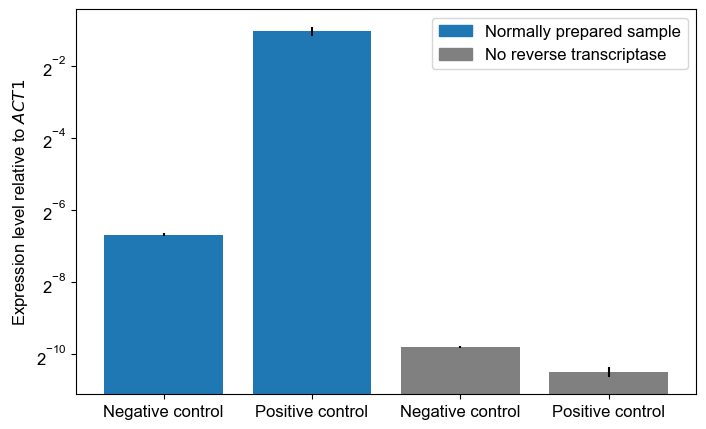

In [58]:
import matplotlib.patches as mpatches
se_er_matrix=np.array([list(temp_input['dCT_fold_change']-temp_input['dCT_fold_change_min_se']),list(-temp_input['dCT_fold_change']+temp_input['dCT_fold_change_max_se'])])
plt.figure(figsize=(8,5))
plt.bar(temp_input['Sample Name'],temp_input['dCT_fold_change'],
        color=['tab:blue', 'tab:blue', 'grey', 'grey'],)
plt.errorbar(temp_input['Sample Name'],temp_input['dCT_fold_change'],yerr=se_er_matrix, 
             linestyle="None",ecolor='black')
# plt.title("RT-qPCR for confirmation promoters in YPD medium")
plt.ylabel("Expression level relative to $\it{ACT1}$")
# plt.yscale('log',base = 2)
plt.xticks(temp_input['Sample Name'],['Negative control','Positive control','Negative control','Positive control'])
pop_a = mpatches.Patch(color='tab:blue', label='Normally prepared sample')
pop_b = mpatches.Patch(color='grey', label='No reverse transcriptase')

plt.legend(handles=[pop_a,pop_b])
plt.yscale('log',base =2 )
# plt.savefig(fig_output_address+'FigS2.pdf')

## Fig. S3

In [60]:
# DNA

In [61]:
temp_r_s2a,temp_p_s2a = scipy.stats.pearsonr(YPD_expression_f100['DNA_relative_count_S1'],YPD_expression_f100['DNA_relative_count_S3'])
temp_r_s2a,temp_p_s2a

(0.9910035971309467, 0.0)

In [62]:
temp_r_s2d,temp_p_s2d = scipy.stats.pearsonr(YPD_expression_f100['DNA_relative_count_S2'],YPD_expression_f100['DNA_relative_count_S3'])
temp_r_s2d,temp_p_s2d

(0.9911514250690632, 0.0)

In [63]:
# RNA

In [64]:
temp_r_s2b,temp_p_s2b = scipy.stats.pearsonr(YPD_expression_f100['RNA_relative_count_S1'],YPD_expression_f100['RNA_relative_count_S3'])
temp_r_s2b,temp_p_s2b

(0.7666887928834616, 0.0)

In [65]:
temp_r_s2e,temp_p_s2e = scipy.stats.pearsonr(YPD_expression_f100['RNA_relative_count_S2'],YPD_expression_f100['RNA_relative_count_S3'])
temp_r_s2e,temp_p_s2e

(0.8446518365766604, 0.0)

In [66]:
# expression

In [67]:
temp_r_s2c,temp_p_s2c = scipy.stats.pearsonr(YPD_expression_f100['S1_normalized_relative'],YPD_expression_f100['S3_normalized_relative'])
temp_r_s2c,temp_p_s2c

(0.42077422883208637, 0.0)

In [68]:
temp_r_s2f,temp_p_s2f = scipy.stats.pearsonr(YPD_expression_f100['S2_normalized_relative'],YPD_expression_f100['S3_normalized_relative'])
temp_r_s2f,temp_p_s2f

(0.5308867633132781, 0.0)

In [69]:
temp_r_s2c_x,temp_p_s2c_x = scipy.stats.pearsonr(subset_1d_x['S1_normalized_relative'],subset_1d_x['S3_normalized_relative'])
temp_r_s2c_x,temp_p_s2c_x

(0.8505605042802766, 3.804945115644202e-139)

In [70]:
temp_r_s2f_x,temp_p_s2f_x = scipy.stats.pearsonr(subset_1d_x['S2_normalized_relative'],subset_1d_x['S3_normalized_relative'])
temp_r_s2f_x,temp_p_s2f_x

(0.9285260624882457, 2.0154359365568873e-213)

In [74]:
# the correlation between DNA count and cDNA count
temp_r_1b,temp_p_1b = scipy.stats.pearsonr(YPD_expression_f100[
    'DNA_relative_count_S1'],YPD_expression_f100['DNA_relative_count_S2'])
# the correlation between DNA count and cDNA count
temp_r_1c,temp_p_1c = scipy.stats.pearsonr(YPD_expression_f100[
    'RNA_relative_count_S1'],YPD_expression_f100['RNA_relative_count_S2'])

In [76]:
temp_r_1d,temp_p_1d = scipy.stats.pearsonr(
    YPD_expression_f100['S1_normalized_relative'],YPD_expression_f100['S2_normalized_relative'])

In [78]:
temp_r_1d_x,temp_p_1d_x = scipy.stats.pearsonr(subset_1d_x['S1_normalized_relative'],subset_1d_x['S2_normalized_relative'])

Text(1.05, 1.1, '$\\it{r}$ = 0.85, $\\it{P}$ < 0.0001')

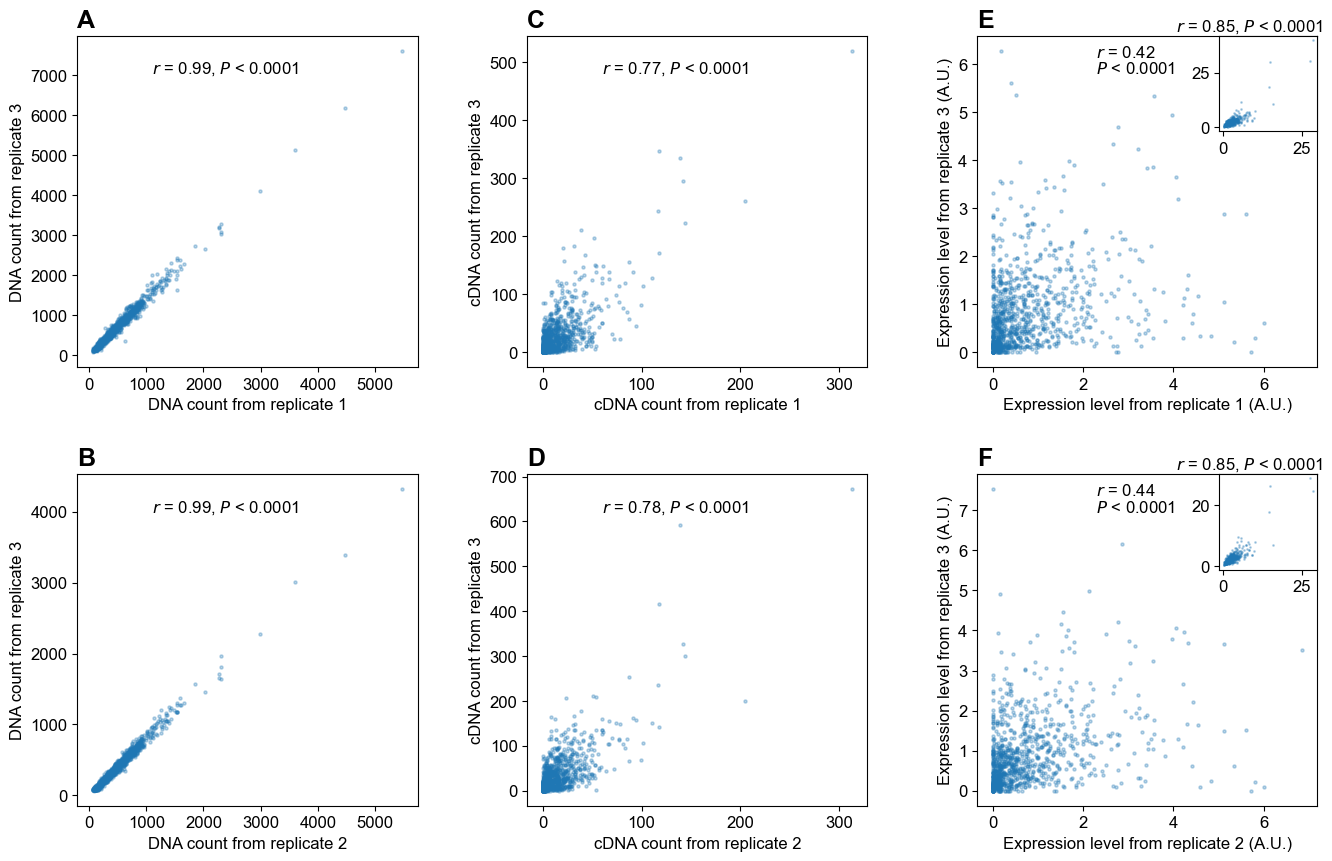

In [79]:
gs = gridspec.GridSpec(23, 36) 
fig1 = plt.figure(figsize=(16,10))
#Here I generate sub figure object and assign to corresponding location
# YPD
# DNA cor
ax1=fig1.add_subplot(gs[:10, :10])

ax1.scatter(YPD_expression_f100['DNA_relative_count_S1'][re_sampled],
            YPD_expression_f100['DNA_relative_count_S3'][re_sampled] ,s=5, alpha = 0.3  )
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 1')
ax1.set_ylabel('DNA count from replicate 3')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s2a,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[0:10, 13:23])
ax2.scatter(YPD_expression_f100['RNA_relative_count_S1'][re_sampled],
            YPD_expression_f100['RNA_relative_count_S3'][re_sampled],s =5, alpha = 0.3 )
ax2.set_title('C',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 1')
ax2.set_ylabel('cDNA count from replicate 3')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s2b,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[:10, 26:36])
ax3.scatter(YPD_expression_f100['S1_normalized_relative'][re_sampled],
            YPD_expression_f100['S3_normalized_relative'][re_sampled],s =5, alpha = 0.3 )
ax3.set_title('E',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 1 (A.U.)')
ax3.set_ylabel('Expression level from replicate 3 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_s2c,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[:3, 33:36])


ax4.scatter(subset_1d_x['S1_normalized_relative'],subset_1d_x['S3_normalized_relative'],s=1, alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_s2c_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)


# replicate 2 vs replicate 3

ax1=fig1.add_subplot(gs[13:23, :10])

ax1.scatter(YPD_expression_f100['DNA_relative_count_S1'][re_sampled],
            YPD_expression_f100['DNA_relative_count_S2'][re_sampled] ,s=5, alpha = 0.3)
ax1.set_title('B',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 2')
ax1.set_ylabel('DNA count from replicate 3')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_1b,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[13:23, 13:23])
ax2.scatter(YPD_expression_f100['RNA_relative_count_S1'][re_sampled],
            YPD_expression_f100['RNA_relative_count_S2'][re_sampled],s =5, alpha = 0.3 )
ax2.set_title('D',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 2')
ax2.set_ylabel('cDNA count from replicate 3')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_1c,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[13:23, 26:36])
ax3.scatter(YPD_expression_f100['S1_normalized_relative'][re_sampled],
            YPD_expression_f100['S2_normalized_relative'][re_sampled],s =5, alpha = 0.3 )
ax3.set_title('F',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 2 (A.U.)')
ax3.set_ylabel('Expression level from replicate 3 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_1d,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[13:16, 33:36])


ax4.scatter(subset_1d_x['S1_normalized_relative'],subset_1d_x['S2_normalized_relative'],s=1, alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_1d_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)
# fig1.savefig(fig_output_address+'FigS3.pdf')

----

## Fig. S4

In [83]:
SCD_expression_f100 = pd.read_csv('Source_data/' + 'FigS4_SCD_expression.csv')
subset_S3 = pd.read_csv('Source_data/' + 'FigS4_SCD_expression_high_rna_subset.csv')

In [84]:
SCD_RT = pd.read_csv('Source_data/' + 'FigS4_SCD_RTqPCR.csv')

In [112]:
Recontructed_RD_SCD = pd.read_csv('Source_data/' + 'FigS4_SCD_reconstructed_promoters.csv')

In [86]:
np.random.seed(1)
SCD_re_sampled = np.random.choice(SCD_expression_f100.shape[0],1000,replace = False)

* **<font color=blue>I choose the top 1th percentile to plot</font>**

In [87]:
cutoff_feature = 'RNA_absolute_count_Total' #'Mean_normalized_relative' # expression_normalized #RNA_absolute_count_Total
temp_RNA_cutoff = SCD_expression_f100[cutoff_feature].quantile([0.99]).values[0]
subset_S3 = SCD_expression_f100[SCD_expression_f100[cutoff_feature]>=temp_RNA_cutoff]
print(subset_S3.shape[0])

1463


* **<font color=blue>NC control and PC control</font>**

In [90]:
# DNA

In [91]:
temp_r_s3a,temp_p_s3a = scipy.stats.pearsonr(SCD_expression_f100['DNA_relative_count_S1'],SCD_expression_f100['DNA_relative_count_S2'])
temp_r_s3a,temp_p_s3a

(0.9688785548734736, 0.0)

In [92]:
temp_r_s3d,temp_p_s3d = scipy.stats.pearsonr(SCD_expression_f100['DNA_relative_count_S1'],SCD_expression_f100['DNA_relative_count_S3'])
temp_r_s3d,temp_p_s3d

(0.9631101995923268, 0.0)

In [93]:
temp_r_s3g,temp_p_s3g = scipy.stats.pearsonr(SCD_expression_f100['DNA_relative_count_S2'],SCD_expression_f100['DNA_relative_count_S3'])
temp_r_s3g,temp_p_s3g

(0.9634504147006222, 0.0)

In [94]:
# RNA

In [95]:
temp_r_s3b,temp_p_s3b = scipy.stats.pearsonr(SCD_expression_f100['RNA_relative_count_S1'],SCD_expression_f100['RNA_relative_count_S2'])
temp_r_s3b,temp_p_s3b

(0.5109086222368704, 0.0)

In [96]:
temp_r_s3e,temp_p_s3e = scipy.stats.pearsonr(SCD_expression_f100['RNA_relative_count_S1'],SCD_expression_f100['RNA_relative_count_S3'])
temp_r_s3e,temp_p_s3e

(0.5208398456462171, 0.0)

In [97]:
temp_r_s3h,temp_p_s3h = scipy.stats.pearsonr(SCD_expression_f100['RNA_relative_count_S2'],SCD_expression_f100['RNA_relative_count_S3'])
temp_r_s3h,temp_p_s3h

(0.494905851650163, 0.0)

In [98]:
# expression

In [99]:
temp_r_s3c,temp_p_s3c = scipy.stats.pearsonr(SCD_expression_f100['S1_normalized_relative'],SCD_expression_f100['S2_normalized_relative'])
temp_r_s3c,temp_p_s3c

(0.29749733371179315, 0.0)

In [100]:
temp_r_s3f,temp_p_s3f = scipy.stats.pearsonr(SCD_expression_f100['S1_normalized_relative'],SCD_expression_f100['S3_normalized_relative'])
temp_r_s3f,temp_p_s3f

(0.30213646675286865, 0.0)

In [101]:
temp_r_s3i,temp_p_s3i = scipy.stats.pearsonr(SCD_expression_f100['S2_normalized_relative'],SCD_expression_f100['S3_normalized_relative'])
temp_r_s3i,temp_p_s3i

(0.2766430611056896, 0.0)

In [102]:
# expression

In [103]:
temp_r_s3c_x,temp_p_s3c_x = scipy.stats.pearsonr(subset_S3['S1_normalized_relative'],subset_S3['S2_normalized_relative'])
temp_r_s3c_x,temp_p_s3c_x

(0.8221365096590458, 0.0)

In [104]:
temp_r_s3f_x,temp_p_s3f_x = scipy.stats.pearsonr(subset_S3['S1_normalized_relative'],subset_S3['S3_normalized_relative'])
temp_r_s3f_x,temp_p_s3f_x

(0.766379937480267, 4.231501783589379e-283)

In [105]:
temp_r_s3i_x,temp_p_s3i_x = scipy.stats.pearsonr(subset_S3['S2_normalized_relative'],subset_S3['S3_normalized_relative'])
temp_r_s3i_x,temp_p_s3i_x

(0.7327122342882346, 1.7874574738444704e-246)

In [109]:
t_SCD_RT,p_SCD_RT = scipy.stats.pearsonr(Recontructed_RD_SCD.Expression_mean,SCD_RT['dCT_fold_change'])

### Plotting

Text(0, 0.5, 'Expression level based on RT-qPCR (A.U.)')

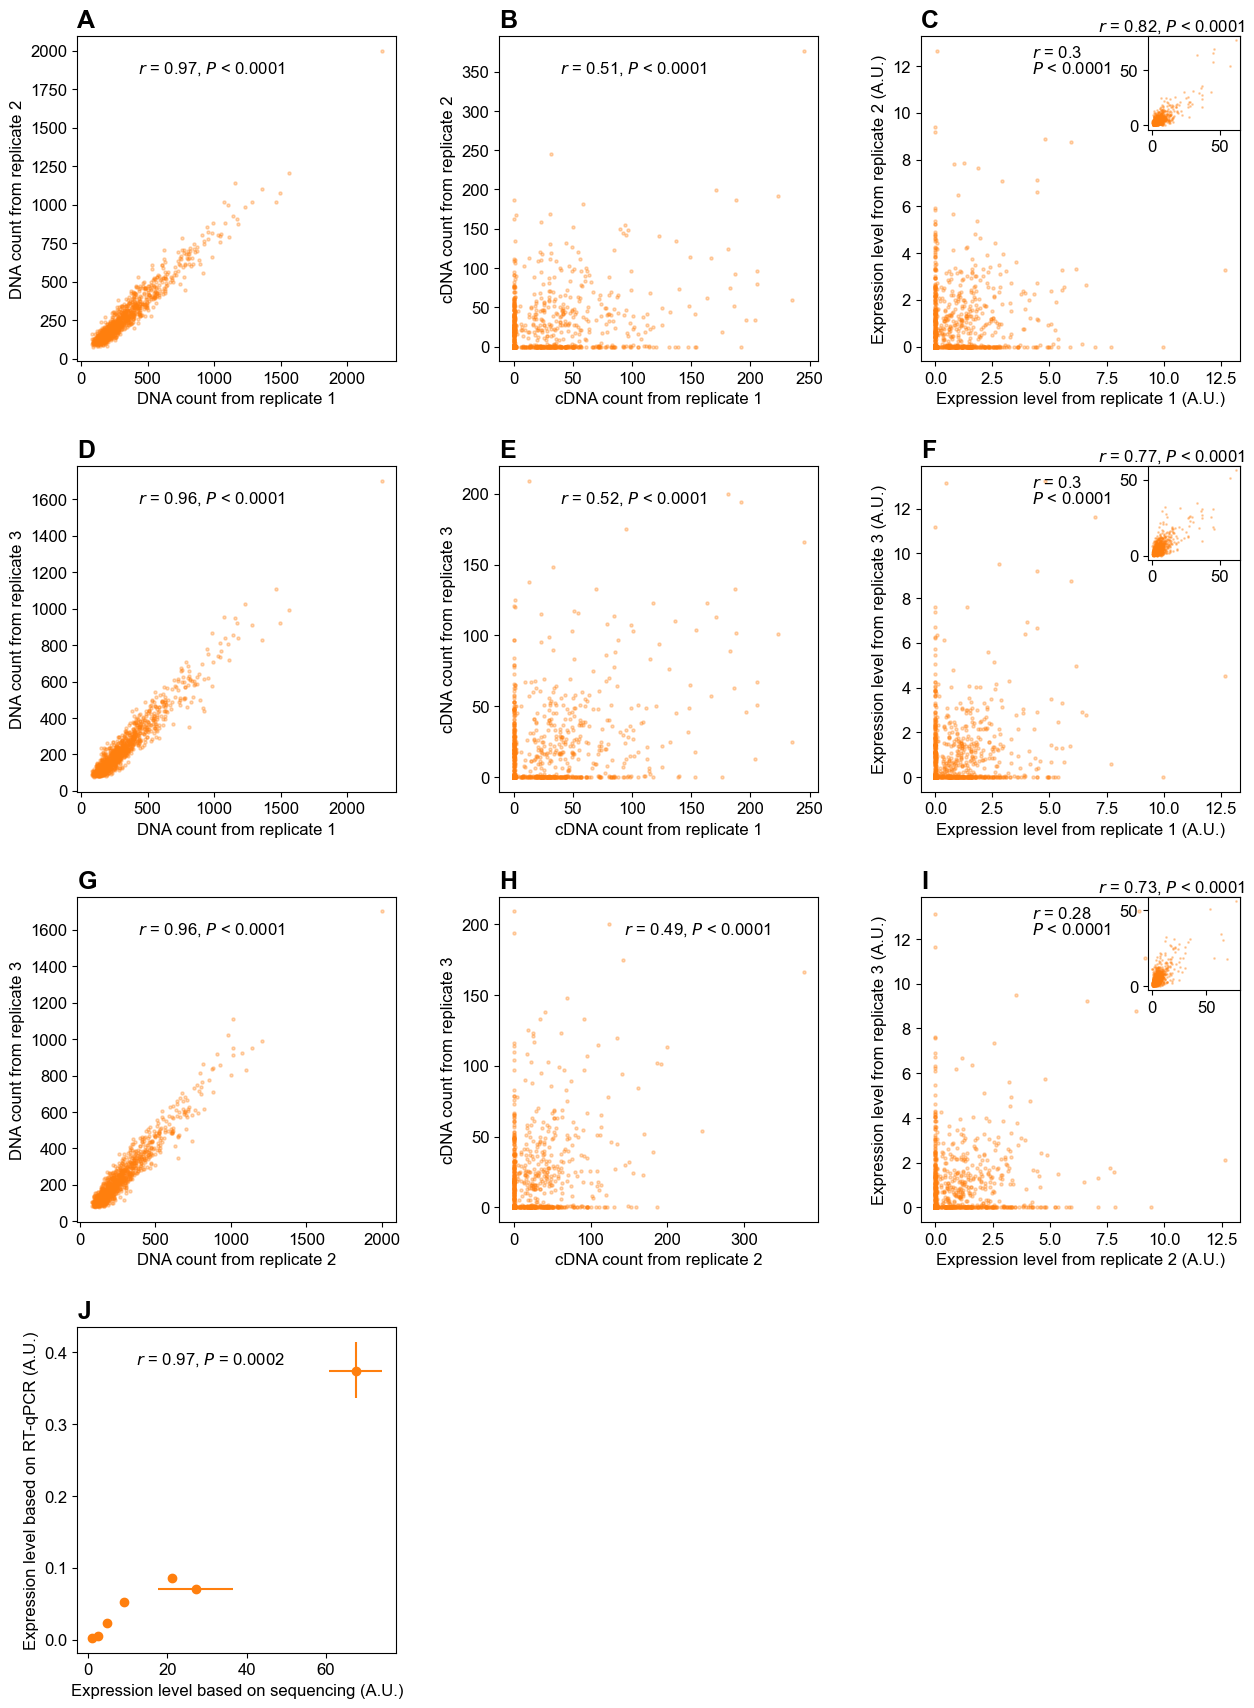

In [113]:
gs = gridspec.GridSpec(49, 36) 
fig1 = plt.figure(figsize=(15,21))
#Here I generate sub figure object and assign to corresponding location
# replicate 1 vs replicate 2
# DNA cor
ax1=fig1.add_subplot(gs[:10, :10])

ax1.scatter(SCD_expression_f100['DNA_relative_count_S1'][SCD_re_sampled],
            SCD_expression_f100['DNA_relative_count_S2'][SCD_re_sampled] ,s=5, color="tab:orange", alpha = 0.3)
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 1')
ax1.set_ylabel('DNA count from replicate 2')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3a,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[0:10, 13:23])
ax2.scatter(SCD_expression_f100['RNA_relative_count_S1'][SCD_re_sampled],
            SCD_expression_f100['RNA_relative_count_S2'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3)
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 1')
ax2.set_ylabel('cDNA count from replicate 2')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3b,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[:10, 26:36])
ax3.scatter(SCD_expression_f100['S1_normalized_relative'][SCD_re_sampled],
            SCD_expression_f100['S2_normalized_relative'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3)
ax3.set_title('C',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 1 (A.U.)')
ax3.set_ylabel('Expression level from replicate 2 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_s3c,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[:3, 33:36])


ax4.scatter(subset_S3['S1_normalized_relative'],subset_S3['S2_normalized_relative'],s=1, color="tab:orange", alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_s3c_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)


# replicate 1 vs replicate 3

ax1=fig1.add_subplot(gs[13:23, :10])

ax1.scatter(SCD_expression_f100['DNA_relative_count_S1'][SCD_re_sampled],
            SCD_expression_f100['DNA_relative_count_S3'][SCD_re_sampled] ,s =5 , color="tab:orange", alpha = 0.3)
ax1.set_title('D',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 1')
ax1.set_ylabel('DNA count from replicate 3')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3d,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[13:23, 13:23])
ax2.scatter(SCD_expression_f100['RNA_relative_count_S1'][SCD_re_sampled],
            SCD_expression_f100['RNA_relative_count_S3'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3 )
ax2.set_title('E',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 1')
ax2.set_ylabel('cDNA count from replicate 3')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3e,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[13:23, 26:36])
ax3.scatter(SCD_expression_f100['S1_normalized_relative'][SCD_re_sampled],
            SCD_expression_f100['S3_normalized_relative'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3 )
ax3.set_title('F',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 1 (A.U.)')
ax3.set_ylabel('Expression level from replicate 3 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_s3f,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[13:16, 33:36])


ax4.scatter(subset_S3['S1_normalized_relative'],subset_S3['S3_normalized_relative'],s=1, color="tab:orange", alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_s3f_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)



# replicate 2 vs replicate 3


ax1=fig1.add_subplot(gs[26:36, :10])

ax1.scatter(SCD_expression_f100['DNA_relative_count_S2'][SCD_re_sampled],
            SCD_expression_f100['DNA_relative_count_S3'][SCD_re_sampled] ,s =5 , color="tab:orange", alpha = 0.3)
ax1.set_title('G',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 2')
ax1.set_ylabel('DNA count from replicate 3')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3g,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[26:36, 13:23])
ax2.scatter(SCD_expression_f100['RNA_relative_count_S2'][SCD_re_sampled],
            SCD_expression_f100['RNA_relative_count_S3'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3 )
ax2.set_title('H',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 2')
ax2.set_ylabel('cDNA count from replicate 3')
ax2.text(0.85,0.9, "$\it{r}$ = "+str(round(temp_r_s3h,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[26:36, 26:36])
ax3.scatter(SCD_expression_f100['S2_normalized_relative'][SCD_re_sampled],
            SCD_expression_f100['S3_normalized_relative'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3 )
ax3.set_title('I',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 2 (A.U.)')
ax3.set_ylabel('Expression level from replicate 3 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_s3i,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[26:29, 33:36])


ax4.scatter(subset_S3['S2_normalized_relative'],subset_S3['S3_normalized_relative'],s=1, color="tab:orange", alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_s3i_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)


se_er_matrix=np.array([list(SCD_RT['dCT_fold_change']-SCD_RT['dCT_fold_change_min_se']),list(-SCD_RT['dCT_fold_change']+SCD_RT['dCT_fold_change_max_se'])])
ax5 = fig1.add_subplot(gs[39:49, :10])
ax5.text(0.65,0.9, "$\it{r}$ = "+str(round(t_SCD_RT,2))+", " + "$\it{P}$" + " = 0.0002", size=12, ha="right",verticalalignment='center', transform=ax5.transAxes)
ax5.errorbar(Recontructed_RD_SCD.Expression_mean,SCD_RT['dCT_fold_change'], xerr=Recontructed_RD_SCD.Expression_sem,yerr=se_er_matrix,fmt="o", color="tab:orange")
ax5.set_title('J',weight='bold', loc='left', size= 18)
ax5.set_xlabel('Expression level based on sequencing (A.U.)')
ax5.set_ylabel('Expression level based on RT-qPCR (A.U.)')
# fig1.savefig(fig_output_address+'FigS4.pdf')

---

## Fig. S5 

In [114]:
YPD_expression_pc = pd.read_csv('Source_data/' + 'FigS5_YPD_pc_expression.csv')
YPD_expression_nc = pd.read_csv('Source_data/' + 'FigS5_YPD_nc_expression.csv')
SCD_expression_pc = pd.read_csv('Source_data/' + 'FigS5_SCD_pc_expression.csv')
SCD_expression_nc = pd.read_csv('Source_data/' + 'FigS5_SCD_nc_expression.csv')

Text(0.1, 0.95, 'Negative control')

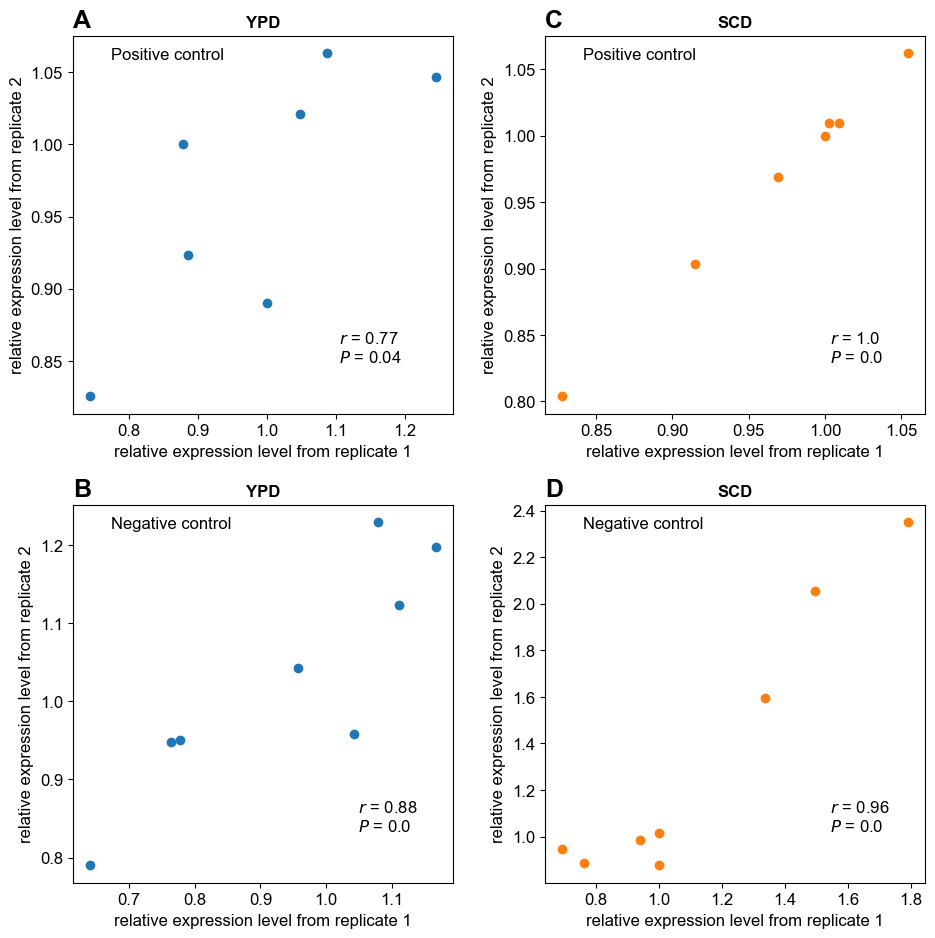

In [115]:
gs = gridspec.GridSpec(11, 11) 
fig1 = plt.figure(figsize=(11,11))

#Here I generate sub figure object and assign to corresponding location
# YPD

temp_r_S2_pc,temp_p_S2_pc = scipy.stats.pearsonr(YPD_expression_pc['S1_normalized_relative'],YPD_expression_pc['S2_normalized_relative'])

temp_r_S2_nc,temp_p_S2_nc = scipy.stats.pearsonr(YPD_expression_nc['S1_normalized_relative'],YPD_expression_nc['S2_normalized_relative'])
ax1=fig1.add_subplot(gs[:5, :5])

ax1.scatter(YPD_expression_pc['S1_normalized_relative']/YPD_expression_pc['S1_normalized_relative'].median(),
            YPD_expression_pc['S2_normalized_relative']/YPD_expression_pc['S2_normalized_relative'].median(),
           label = 'PC')
ax1.text(0.7,0.2, "$\it{r}$ = "+str(round(temp_r_S2_pc,2)), size=12, ha="left",verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.7,0.15,  "$\it{P}$ = "+str(round(temp_p_S2_pc,2)), size=12, ha="left",verticalalignment='center', transform=ax1.transAxes)
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_title('YPD',loc='center',weight = 'bold',size= 12)
ax1.set_xlabel('relative expression level from replicate 1')
ax1.set_ylabel('relative expression level from replicate 2')
ax1.text(0.1,0.95,'Positive control',size=12, ha="left",verticalalignment='center', transform=ax1.transAxes)


ax2=fig1.add_subplot(gs[6:11, :5])
ax2.scatter(YPD_expression_nc['S1_normalized_relative']/YPD_expression_nc['S1_normalized_relative'].median(),
            YPD_expression_nc['S2_normalized_relative']/YPD_expression_nc['S2_normalized_relative'].median(),
           label = 'NC')
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.set_xlabel('relative expression level from replicate 1')
ax2.set_ylabel('relative expression level from replicate 2')
ax2.set_title('YPD',loc='center',weight = 'bold',size= 12)
ax2.text(0.75,0.2, "$\it{r}$ = "+str(round(temp_r_S2_nc,2)), size=12, ha="left",verticalalignment='center', transform=ax2.transAxes)
ax2.text(0.75,0.15,  "$\it{P}$ = "+str(round(temp_p_S2_nc,2)), size=12, ha="left",verticalalignment='center', transform=ax2.transAxes)
ax2.text(0.1,0.95,'Negative control',size=12, ha="left",verticalalignment='center', transform=ax2.transAxes)

temp_r_S2_pc,temp_p_S2_pc = scipy.stats.pearsonr(SCD_expression_pc['S1_normalized_relative'],SCD_expression_pc['S2_normalized_relative'])

temp_r_S2_nc,temp_p_S2_nc = scipy.stats.pearsonr(SCD_expression_nc['S1_normalized_relative'],SCD_expression_nc['S2_normalized_relative'])

# SCD
ax3=fig1.add_subplot(gs[:5, 6:11])
ax3.scatter(SCD_expression_pc['S1_normalized_relative']/SCD_expression_pc['S1_normalized_relative'].median(),
            SCD_expression_pc['S2_normalized_relative']/SCD_expression_pc['S2_normalized_relative'].median(),
           label = 'PC',color="tab:orange")
ax3.text(0.75,0.2, "$\it{r}$ = "+str(round(temp_r_S2_pc,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.75,0.15,  "$\it{P}$ = "+str(round(temp_p_S2_pc,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.set_title('C',weight='bold', loc='left', size= 18)
ax3.set_title('SCD',loc='center',weight = 'bold',size = 12)
ax3.set_xlabel('relative expression level from replicate 1',size = 12)
ax3.set_ylabel('relative expression level from replicate 2',size = 12)
ax3.text(0.1,0.95,'Positive control',size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)

ax4=fig1.add_subplot(gs[6:11, 6:11])
ax4.scatter(SCD_expression_nc['S1_normalized_relative']/SCD_expression_nc['S1_normalized_relative'].median(),
            SCD_expression_nc['S2_normalized_relative']/SCD_expression_nc['S2_normalized_relative'].median(),
           label = 'NC',color="tab:orange")
ax4.set_title('D',weight='bold', loc='left', size= 18)
ax4.set_xlabel('relative expression level from replicate 1',size = 12)
ax4.set_ylabel('relative expression level from replicate 2',size = 12)
ax4.set_title('SCD',loc='center',weight = 'bold',size= 12)
ax4.text(0.75,0.2, "$\it{r}$ = "+str(round(temp_r_S2_nc,2)), size=12, ha="left",verticalalignment='center', transform=ax4.transAxes)
ax4.text(0.75,0.15,  "$\it{P}$ = "+str(round(temp_p_S2_nc,2)), size=12, ha="left",verticalalignment='center', transform=ax4.transAxes)

ax4.text(0.1,0.95,'Negative control',size=12, ha="left",verticalalignment='center', transform=ax4.transAxes)
# fig1.savefig(fig_output_address+'FigS5.pdf')

---

## Fig. S6

In [116]:
SCD_summary_e = pd.read_csv(
    'Source_data/' + 'FigS6_SCD_RD_comparison_summary.csv')

In [117]:
YPD_summary_e = pd.read_csv(
    'Source_data/' + 'FigS6_YPD_RD_comparison_summary.csv')

Text(0.5, 0, 'DNA count cutoff')

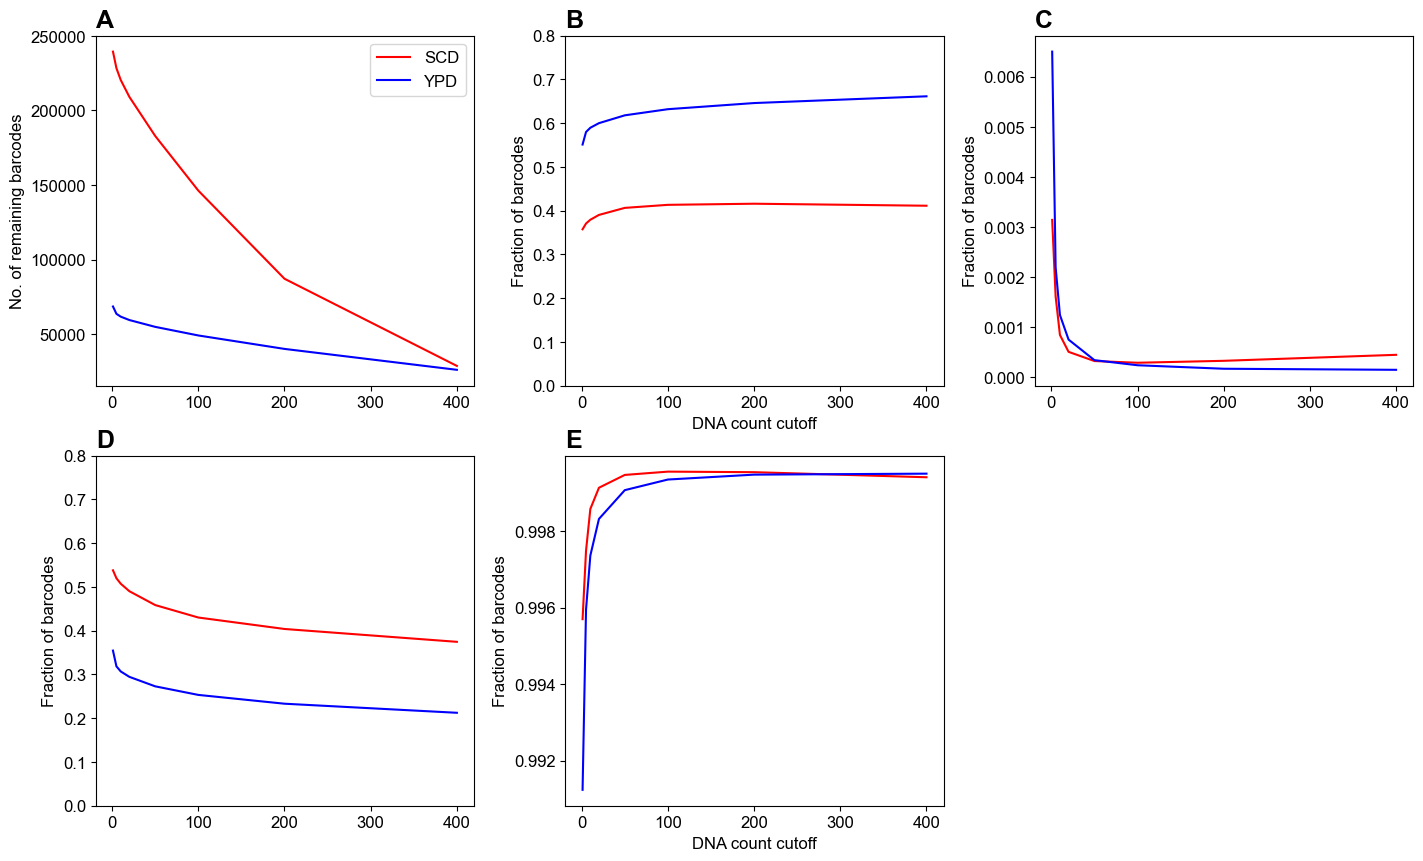

In [118]:
temp_cut_control = 1.0
temp_cut_RNA = 0
temp_df_1 = SCD_summary_e[(SCD_summary_e['Percentile_of_PC']==temp_cut_control)&(SCD_summary_e['RNA_cut_off']==temp_cut_RNA)]
temp_df_2 = YPD_summary_e[(YPD_summary_e['Percentile_of_PC']==temp_cut_control)&(YPD_summary_e['RNA_cut_off']==temp_cut_RNA)]

gs = gridspec.GridSpec(2, 17) 
fig1 = plt.figure(figsize=(17,10))
#Here I generate sub figure object and assign to corresponding location
ax1=fig1.add_subplot(gs[:1, :5])
ax1.plot(temp_df_1['DNA_cut_off'],temp_df_1['Total_barcode'],color="red",label= 'SCD')
ax1.plot(temp_df_2['DNA_cut_off'],temp_df_2['Total_barcode'],color="blue",label='YPD')
# ax1.plot(temp_df_3['DNA_cut_off'],temp_df_3['Total_barcode'],color="orange",label='YPD_old')
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_ylabel('No. of remaining barcodes')
ax1.legend(loc="upper right")

# ax1.axvline(x=10,color='k', linestyle='--')

ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.plot(temp_df_1['DNA_cut_off'],temp_df_1['better_than_nc_ratio'],color="red",label= 'SCD')
ax2.plot(temp_df_2['DNA_cut_off'],temp_df_2['better_than_nc_ratio'],color="blue",label='YPD_new')
# ax2.plot(temp_df_3['DNA_cut_off'],temp_df_3['better_than_nc_ratio'],color="orange",label='YPD_old')
ax2.set_ylim(0,0.8)
ax2.set_ylabel('Fraction of barcodes')
# ax2.axvline(x=10,color='k', linestyle='--')
ax2.set_xlabel('DNA count cutoff')

ax3=fig1.add_subplot(gs[:1, 12:17])
ax3.set_title('C',weight='bold', loc='left', size= 18)
ax3.plot(temp_df_1['DNA_cut_off'],temp_df_1['better_than_pc_ratio'],color="red",label= 'SCD')
ax3.plot(temp_df_2['DNA_cut_off'],temp_df_2['better_than_pc_ratio'],color="blue",label='YPD_new')
ax3.set_ylabel('Fraction of barcodes')
# ax3.plot(temp_df_3['DNA_cut_off'],temp_df_3['better_than_pc_ratio'],color="orange",label='YPD_old')

# ax3.set_title('Fraction of barcodes > positive control')
# ax3.axvline(x=10,color='k', linestyle='--')

ax4=fig1.add_subplot(gs[1:2, :5])
ax4.set_title('D',weight='bold', loc='left', size= 18)
ax4.plot(temp_df_1['DNA_cut_off'],temp_df_1['worse_than_nc_ratio'],color="red",label= 'SCD')
ax4.plot(temp_df_2['DNA_cut_off'],temp_df_2['worse_than_nc_ratio'],color="blue",label='YPD_new')
# ax4.plot(temp_df_3['DNA_cut_off'],temp_df_3['worse_than_nc_ratio'],color="orange",label='YPD_old')
ax4.set_ylabel('Fraction of barcodes')
ax4.set_ylim(0,0.8)
# ax4.set_title('Fraction of barcodes < negative control')
# ax4.axvline(x=10,color='k', linestyle='--')


ax5=fig1.add_subplot(gs[1:2, 6:11])
ax5.set_title('E',weight='bold', loc='left', size= 18)
ax5.set_ylabel('Fraction of barcodes')
ax5.plot(temp_df_1['DNA_cut_off'],temp_df_1['worse_than_pc_ratio'],color="red",label= 'SCD')
ax5.plot(temp_df_2['DNA_cut_off'],temp_df_2['worse_than_pc_ratio'],color="blue",label='YPD_new')
# ax5.plot(temp_df_3['DNA_cut_off'],temp_df_3['worse_than_pc_ratio'],color="orange",label='YPD_old')

# ax5.set_title('Fraction of barcodes < positive control')
ax5.set_xlabel('DNA count cutoff')
# ax5.axvline(x=10,color='k', linestyle='--')
# fig1.text(0.4, 0.92, 'PC cutoff of 1.0 and RNA_cutoff of 0', va='center', rotation='horizontal',fontsize=15)
# fig1.savefig(fig_output_address+'FigS6.pdf')

---

## Fig. S7 

In [122]:
p_3ab_SCD = pd.read_csv('Source_data/' + 'FigS7_SCD_sequence_feature_quantile.csv')

Text(0, 0.5, 'TATA box probability')

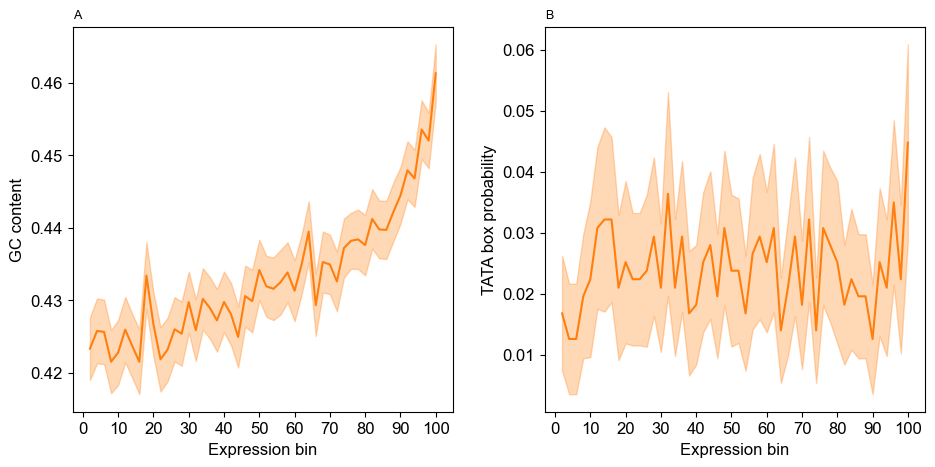

In [123]:
gs = gridspec.GridSpec(1, 11) 
fig1 = plt.figure(figsize=(11,5))
#Here I generate sub figure object and assign to corresponding location

#panel A for GC content on expression of YPD
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',size = 9)
ax1.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('GC_content_mean')], color = 'tab:orange')
ax1.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('GC_content_mean')]-p_3ab_SCD[('GC_content_sem')]*1.96, 
                 p_3ab_SCD[('GC_content_mean')]+p_3ab_SCD[('GC_content_sem')]*1.96,alpha = 0.3,color = 'tab:orange')
ax1.set_xticks(np.arange(0, 110,10))
ax1.set_xlabel('Expression bin')
ax1.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('GC_content_mean')], color = 'tab:orange')
# ax1.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('GC_content_mean')]-p_3ab_SCD[('GC_content_sem')]*1.96, p_3ab_SCD[('GC_content_mean')]+p_3ab_SCD[('GC_content_sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',loc='left',size = 9)
ax2.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('TATA_box_mean')], color = 'tab:orange')
ax2.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('TATA_box_mean')]-p_3ab_SCD[('TATA_box_sem')]*1.96, 
                 p_3ab_SCD[('TATA_box_mean')]+p_3ab_SCD[('TATA_box_sem')]*1.96,alpha = 0.3,color = 'tab:orange')
ax2.set_xticks(np.arange(0, 110,10))
ax2.set_xlabel('Expression bin')
ax2.set_ylabel('TATA box probability')
# fig1.savefig(fig_output_address+'FigS7.pdf')

## Fig. S8

In [124]:
temp_agg1 = pd.read_csv('Source_data/' + 'FigS8_YPD_native_promoter_sequence_feature_quantile.csv')

In [126]:
temp_agg2 = pd.read_csv('Source_data/' + 'FigS8_SCD_native_promoter_sequence_feature_quantile.csv')

Text(0, 0.5, 'TATA box probability')

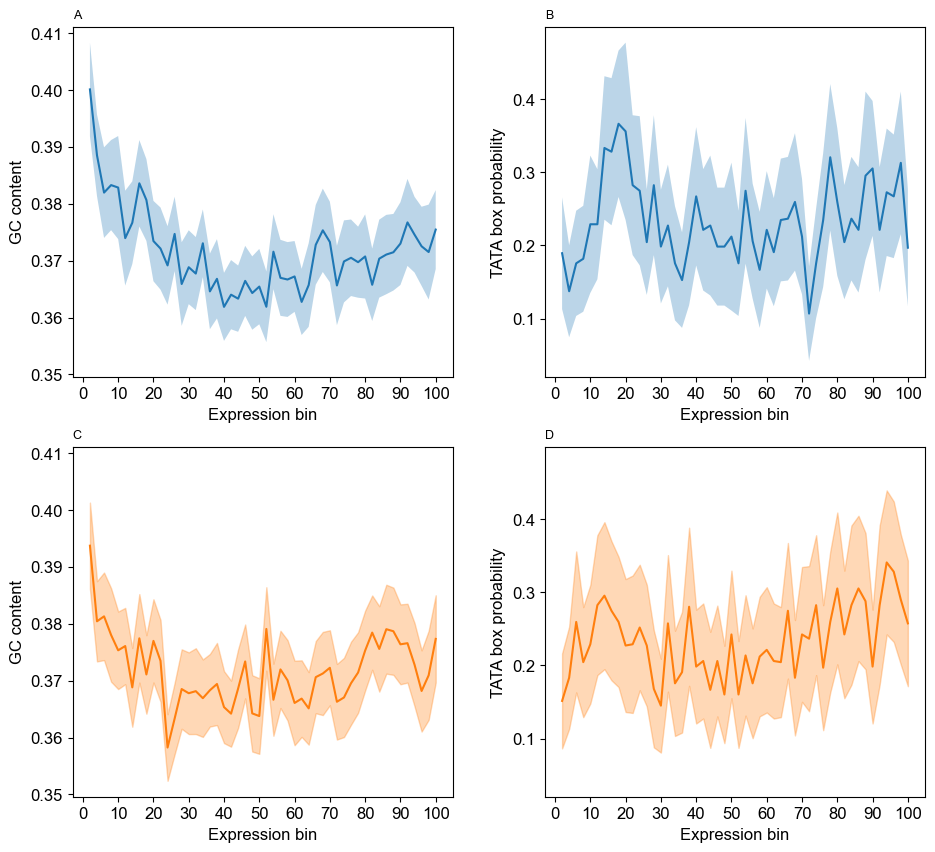

In [127]:
gs = gridspec.GridSpec(2, 11) 
fig1 = plt.figure(figsize=(11,10))
#panel A for GC content on expression of YPD
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',size = 9)
ax1.plot((temp_agg1['quantile']+1)*2,temp_agg1[('GC_content_mean')], color = 'tab:blue')
ax1.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('GC_content_mean')]-temp_agg1[('GC_content_sem')]*1.96, temp_agg1[('GC_content_mean')]+temp_agg1[('GC_content_sem')]*1.96,alpha = 0.3)
ax1.set_xticks(np.arange(0, 110,10))
ax1.set_xlabel('Expression bin')
ax1.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((temp_agg1['quantile']+1)*2,temp_agg1[('GC_content_mean')], color = 'tab:orange')
# ax1.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('GC_content_mean')]-temp_agg1[('GC_content_sem')]*1.96, temp_agg1[('GC_content_mean')]+temp_agg1[('GC_content_sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',loc='left',size = 9)
ax2.plot((temp_agg1['quantile']+1)*2,temp_agg1[('TATA_box_mean')], color = 'tab:blue')
ax2.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('TATA_box_mean')]-temp_agg1[('TATA_box_sem')]*1.96, temp_agg1[('TATA_box_mean')]+temp_agg1[('TATA_box_sem')]*1.96,alpha = 0.3)
ax2.set_xticks(np.arange(0, 110,10))
ax2.set_xlabel('Expression bin')
ax2.set_ylabel('TATA box probability')

ax3=fig1.add_subplot(gs[1:2, :5],sharey=ax1)
ax3.set_title('C',loc='left',size = 9)
ax3.plot((temp_agg2['quantile']+1)*2,temp_agg2[('GC_content_mean')], color = 'tab:orange')
ax3.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('GC_content_mean')]-temp_agg2[('GC_content_sem')]*1.96,
                 temp_agg2[('GC_content_mean')]+temp_agg2[('GC_content_sem')]*1.96,alpha = 0.3, color = 'tab:orange')

ax3.set_xticks(np.arange(0, 110,10))
ax3.set_xlabel('Expression bin')
ax3.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((temp_agg2['quantile']+1)*2,temp_agg2[('GC_content_mean')], color = 'tab:orange')
# ax1.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('GC_content_mean')]-temp_agg2[('GC_content_sem')]*1.96, temp_agg2[('GC_content_mean')]+temp_agg2[('GC_content_sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax4=fig1.add_subplot(gs[1:2, 6:11],sharey=ax2)
ax4.set_title('D',loc='left',size = 9)
ax4.plot((temp_agg2['quantile']+1)*2,temp_agg2[('TATA_box_mean')], color = 'tab:orange')
ax4.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('TATA_box_mean')]-temp_agg2[('TATA_box_sem')]*1.96,
                 temp_agg2[('TATA_box_mean')]+temp_agg2[('TATA_box_sem')]*1.96,alpha = 0.3, color = 'tab:orange')

ax4.set_xticks(np.arange(0, 110,10))
ax4.set_xlabel('Expression bin')
ax4.set_ylabel('TATA box probability')
# fig1.savefig(fig_output_address+'FigS8.pdf')

---

## Fig. S9

In [128]:
temp_agg1 = pd.read_csv('Source_data/' + 'FigS9_YPD_native_promoter_from_TSS_sequence_feature_quantile.csv')

In [129]:
temp_agg2 = pd.read_csv('Source_data/' + 'FigS9_SCD_native_promoter_from_TSS_sequence_feature_quantile.csv')

Text(0, 0.5, 'TATA box probability')

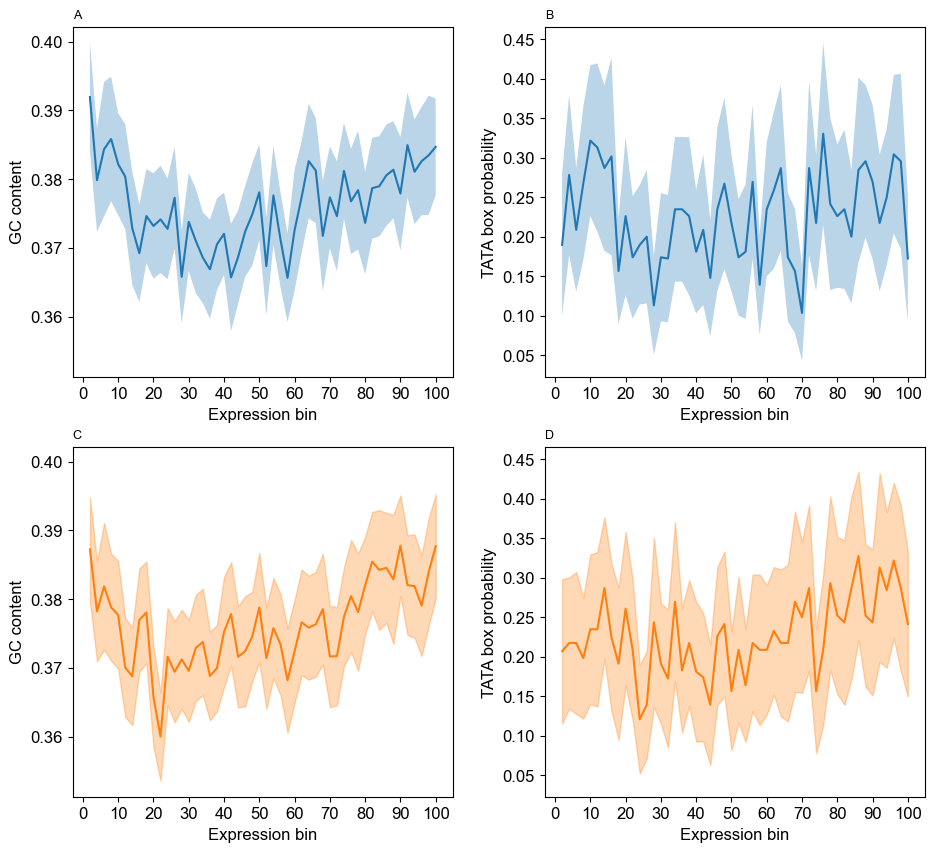

In [130]:
gs = gridspec.GridSpec(2, 11) 
fig1 = plt.figure(figsize=(11,10))
#panel A for GC content on expression of YPD
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',size = 9)
ax1.plot((temp_agg1['quantile']+1)*2,temp_agg1[('GC_content_mean')], color = 'tab:blue')
ax1.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('GC_content_mean')]-temp_agg1[('GC_content_sem')]*1.96, temp_agg1[('GC_content_mean')]+temp_agg1[('GC_content_sem')]*1.96,alpha = 0.3)
ax1.set_xticks(np.arange(0, 110,10))
ax1.set_xlabel('Expression bin')
ax1.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((temp_agg1['quantile']+1)*2,temp_agg1[('GC_content_mean')], color = 'tab:orange')
# ax1.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('GC_content_mean')]-temp_agg1[('GC_content_sem')]*1.96, temp_agg1[('GC_content_mean')]+temp_agg1[('GC_content_sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',loc='left',size = 9)
ax2.plot((temp_agg1['quantile']+1)*2,temp_agg1[('TATA_box_mean')], color = 'tab:blue')
ax2.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('TATA_box_mean')]-temp_agg1[('TATA_box_sem')]*1.96, temp_agg1[('TATA_box_mean')]+temp_agg1[('TATA_box_sem')]*1.96,alpha = 0.3)
ax2.set_xticks(np.arange(0, 110,10))
ax2.set_xlabel('Expression bin')
ax2.set_ylabel('TATA box probability')

ax3=fig1.add_subplot(gs[1:2, :5],sharey=ax1)
ax3.set_title('C',loc='left',size = 9)
ax3.plot((temp_agg2['quantile']+1)*2,temp_agg2[('GC_content_mean')], color = 'tab:orange')
ax3.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('GC_content_mean')]-temp_agg2[('GC_content_sem')]*1.96,
                 temp_agg2[('GC_content_mean')]+temp_agg2[('GC_content_sem')]*1.96,alpha = 0.3, color = 'tab:orange')

ax3.set_xticks(np.arange(0, 110,10))
ax3.set_xlabel('Expression bin')
ax3.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((temp_agg2['quantile']+1)*2,temp_agg2[('GC_content_mean')], color = 'tab:orange')
# ax1.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('GC_content_mean')]-temp_agg2[('GC_content_sem')]*1.96, temp_agg2[('GC_content_mean')]+temp_agg2[('GC_content_sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax4=fig1.add_subplot(gs[1:2, 6:11],sharey=ax2)
ax4.set_title('D',loc='left',size = 9)
ax4.plot((temp_agg2['quantile']+1)*2,temp_agg2[('TATA_box_mean')], color = 'tab:orange')
ax4.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('TATA_box_mean')]-temp_agg2[('TATA_box_sem')]*1.96,
                 temp_agg2[('TATA_box_mean')]+temp_agg2[('TATA_box_sem')]*1.96,alpha = 0.3, color = 'tab:orange')

ax4.set_xticks(np.arange(0, 110,10))
ax4.set_xlabel('Expression bin')
ax4.set_ylabel('TATA box probability')
# fig1.savefig(fig_output_address+'FigS9.pdf')

## Fig. S10

In [131]:
YPD_s_df_r = pd.read_csv('Source_data/' + 'FigS10_YPD_motif_reverse_significant.csv')

In [132]:
SCD_s_df = pd.read_csv('Source_data/' + 'FigS10_SCD_motif_significant.csv')

In [133]:
SCD_s_df_r = pd.read_csv('Source_data/' + 'FigS10_SCD_motif_reverse_significant.csv')

In [138]:
YPD_s_shuffled_df_r = pd.read_csv('Source_data/' + 'FigS10_YPD_motif_reverse_significant_shuffled.csv')

In [139]:
SCD_s_shuffled_df = pd.read_csv('Source_data/' + 'FigS10_SCD_motif_significant_shuffled.csv')

In [140]:
SCD_s_shuffled_df_r = pd.read_csv('Source_data/' + 'FigS10_SCD_motif_reverse_significant_shuffled.csv')

In [141]:
# Pvalue distribution for ScerTF 

Text(0.5, 0, 'P value')

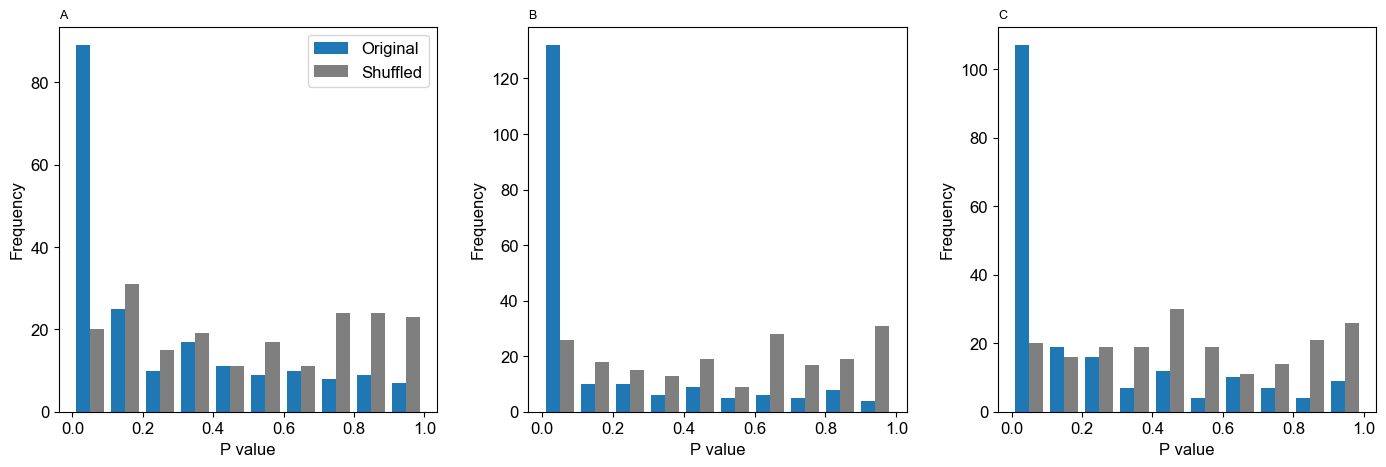

In [142]:
gs = gridspec.GridSpec(1, 17) 
fig1 = plt.figure(figsize=(17,5))
#Here I generate sub figure object and assign to corresponding location

# SCD forward
ax1=fig1.add_subplot(gs[:1, :5])
ax1.hist([SCD_s_df['Ranksum_P_value'],SCD_s_shuffled_df['Ranksum_P_value']],color = ['tab:blue','tab:grey'], label = ['Original','Shuffled'],bins = 10)
ax1.legend(loc='upper right')
ax1.set_title('A',loc='left',size = 9)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('P value')

# YPD reverse
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.hist([YPD_s_df_r['Ranksum_P_value'],YPD_s_shuffled_df_r['Ranksum_P_value']],color = ['tab:blue','tab:grey'], label = ['Original','Shuffled'],bins = 10)
# ax2.legend(loc='upper right')
ax2.set_title('B',loc='left',size = 9)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('P value')

# SCD reverse
ax3=fig1.add_subplot(gs[:1, 12:17])
ax3.hist([SCD_s_df_r['Ranksum_P_value'],SCD_s_shuffled_df_r['Ranksum_P_value']],color = ['tab:blue','tab:grey'], label = ['Original','Shuffled'],bins = 10)
# ax3.legend(loc='upper right')
ax3.set_title('C',loc='left',size = 9)
ax3.set_ylabel('Frequency')
ax3.set_xlabel('P value')
# fig1.savefig(fig_output_address+'FigS10.pdf')